# Projet D'analyse de données NFL Draft 
## MBOURANGA Winn-Elie

A travers ce notebook, nous allons voir ensemble quelles caractéristiques influent sur la position des joueurs de la draft ? 

### 1) Importation du dataframe de l'analyse

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df=pd.read_csv('./nfl_draft_1970-2021.csv')

In [3]:
df

,year,round,pick,team,player,position,age,to,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,1,3,...,444.0,2257.0,32.0,0.0,1.0,0.0,NaN,NaN,NaN,Louisiana Tech
1,1970,1,2,GNB,Mike McCoy,DT,22.0,1980.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22.0,1981.0,0,0,...,254.0,1278.0,13.0,0.0,0.0,0.0,NaN,NaN,NaN,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23.0,1979.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,USC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,2021,7,255,NOR,Kawaan Baker,WR,23.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Alabama
15769,2021,7,256,GNB,Kylin Hill,RB,23.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mississippi St.
15770,2021,7,257,DET,Jermar Jefferson,RB,21.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oregon St.
15771,2021,7,258,WAS,Dax Milne,WR,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BYU


In [4]:
print("Nous avons donc un premier dataset composé de données allant nous servir pour les inofs sur la draft")

Nous avons donc un premier dataset composé de données allant nous servir pour les inofs sur la draft


In [5]:
print("Nous avons dans cet échantillon,",df.shape[0],"individus pour un total de",df.shape[1],"caractéristiques!")

Nous avons dans cet échantillon, 15773 individus pour un total de 29 caractéristiques!


In [10]:
df.fillna('Unknown')

,year,round,pick,team,player,position,age,to,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,1,3,...,444.0,2257.0,32.0,0.0,1.0,0.0,Unknown,Unknown,Unknown,Louisiana Tech
1,1970,1,2,GNB,Mike McCoy,DT,22.0,1980.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Unknown,Unknown,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22.0,1981.0,0,0,...,254.0,1278.0,13.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23.0,1979.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,USC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15768,2021,7,255,NOR,Kawaan Baker,WR,23.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,South Alabama
15769,2021,7,256,GNB,Kylin Hill,RB,23.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Mississippi St.
15770,2021,7,257,DET,Jermar Jefferson,RB,21.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Oregon St.
15771,2021,7,258,WAS,Dax Milne,WR,Unknown,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,BYU


In [11]:
df.dtypes

year               int64
round              int64
pick               int64
team              object
player            object
position          object
age              float64
to               float64
all_pro            int64
pro_bowl           int64
starter            int64
carAV            float64
drAV             float64
games            float64
pass_comp        float64
pass_att         float64
pass_yards       float64
pass_tds         float64
pass_int         float64
rush_att         float64
rush_yards       float64
rush_tds         float64
receptions       float64
rec_yards        float64
rec_tds          float64
interceptions    float64
sacks            float64
tackles          float64
college           object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15773 entries, 0 to 15772
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           15773 non-null  int64  
 1   round          15773 non-null  int64  
 2   pick           15773 non-null  int64  
 3   team           15773 non-null  object 
 4   player         15773 non-null  object 
 5   position       15773 non-null  object 
 6   age            11967 non-null  float64
 7   to             11592 non-null  float64
 8   all_pro        15773 non-null  int64  
 9   pro_bowl       15773 non-null  int64  
 10  starter        15773 non-null  int64  
 11  carAV          11592 non-null  float64
 12  drAV           10168 non-null  float64
 13  games          11563 non-null  float64
 14  pass_comp      11592 non-null  float64
 15  pass_att       11592 non-null  float64
 16  pass_yards     11592 non-null  float64
 17  pass_tds       11592 non-null  float64
 18  pass_i

### 2) Quels sont tout d'abord les postes les plus prisés ?

In [14]:
#filtrage du dataset pour garder uniquement les premiers choix de chaque année
dft=df[ df['round']==1]
dft.fillna('Unknown')

,year,round,pick,team,player,position,age,to,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,1,3,...,444.0,2257.0,32.0,0.0,1.0,0.0,Unknown,Unknown,Unknown,Louisiana Tech
1,1970,1,2,GNB,Mike McCoy,DT,22.0,1980.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Unknown,Unknown,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22.0,1981.0,0,0,...,254.0,1278.0,13.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23.0,1979.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,USC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15541,2021,1,28,NOR,Payton Turner,DE,23.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Houston
15542,2021,1,29,GNB,Eric Stokes,DB,22.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Georgia
15543,2021,1,30,BUF,Gregory Rousseau,DL,21.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Miami (FL)
15544,2021,1,31,BAL,Jayson Oweh,DE,22.0,Unknown,0,0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Penn St.


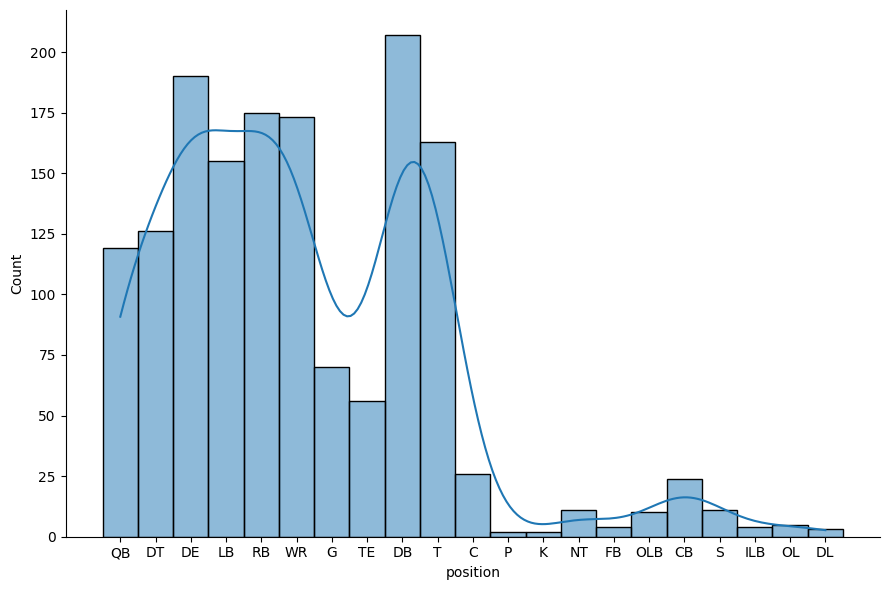

In [36]:
#distribution des postes dans le round 1 sur toutes les années
sb.displot(x="position",  data=dft, kde=True, height=6, aspect=1.5)

On peut en déduire que les postes les plus prisé sont :
- Les DefensiveEnd (DE)
- Les Wides receivers (WR)
- Les RunningBacks (RB)
- les Defensivesbacks (DB)

Donc le poste pourrait influer la position 

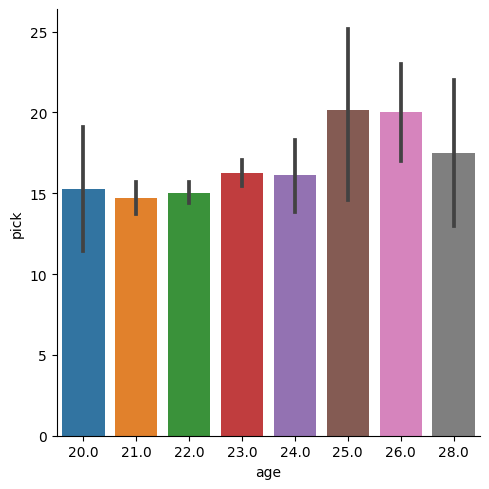

In [62]:
#Position dans le round 1 en fonction de l'age des joueurs
sb.catplot(x="age", y="pick", data=dft, kind='bar')

In [42]:
dft.age.describe()

count    1536.000000
mean       22.142578
std         0.857151
min        20.000000
25%        22.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: age, dtype: float64

Age moyen du 1er round :
22 ans , ce qui semble être très représentatif des joueurs sélectionnées au premier tour

## 3) Performances statistiques des joueurs

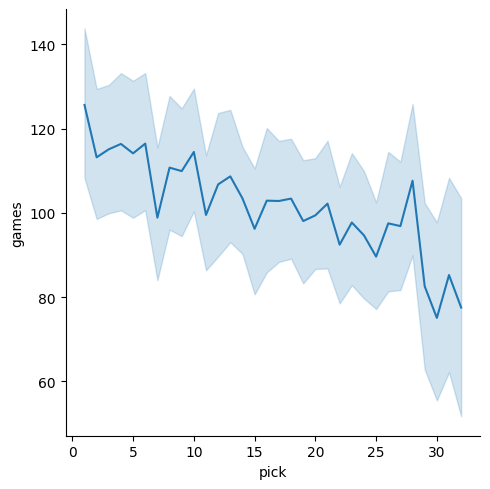

In [78]:
#distance des passes en fonction du nombre de parties jouées
sb.relplot(data=dft, x="pick", y="games", kind='line')

Ici plus la position du joueur augmente lors du 1er tour, plus sont nombre de matchs diminue.
Le nombre de match influence donc sur la position du joueur car cette variable a un effet décroissant sur 

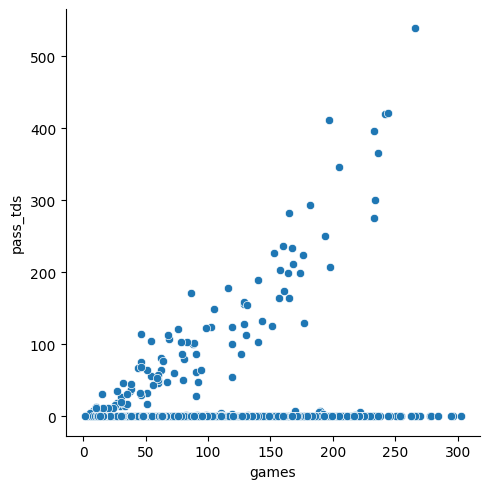

In [85]:
#pass_tds par rapport aux parties jouées
sb.relplot(data=dft, x="games", y="pass_tds")

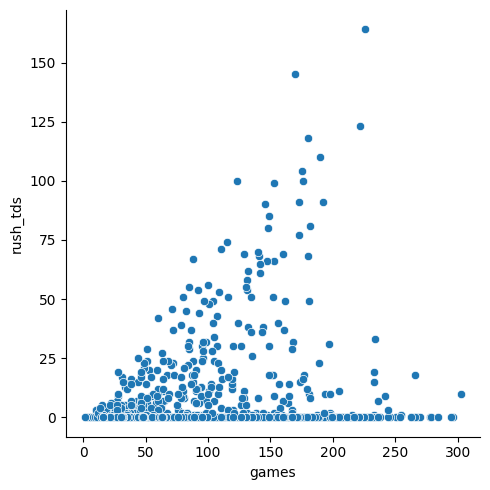

In [86]:
#rush_tds par rapport aux parties jouées
sb.relplot(data=dft, x="games", y="rush_tds")

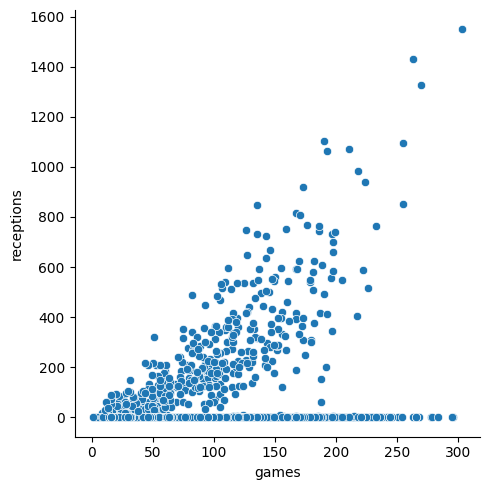

In [87]:
#receptions par rapport aux parties jouées
sb.relplot(data=dft, x="games", y="receptions")